<h2 align="center"> <font color='gray'>scikit-learn</font></h2>
<h3 align="center"> <font color='gray'>DecisionTreeRegressor</font></h3>


<div class="alert alert-block alert-success">  
<b>Descripion:</b> Scikit-learn is a popular open-source machine learning library for Python. It provides a wide range of tools for various machine learning tasks such as classification, regression, clustering, and dimensionality reduction. Scikit-learn also includes tools for data preprocessing, model selection, and evaluation, making it a comprehensive and user-friendly library for machine learning in Python.
</div>

In [1]:
import sys
sys.path.append('../../../utils')
import data_funcs as utils

In [2]:
X,y,features = utils.get_validation_data('../../../data/validation-set.tsv')

<h3 align="center"> <font color='gray'>Creating the sklearn.DecisionTreeRegressor Instance</font></h3>

<div class="alert alert-block alert-success">  
<b>Description:</b> Since the library sklearn is not directly compatible with decision trees from gradient boosting machines made by catboost, we will use sklearn native trained instance.
</div>

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
rgr = DecisionTreeRegressor(max_depth=3)
rgr.fit(X,y);

<div class="alert alert-block alert-warning">  
<b>Information:</b> For further visualizations fit() function to the model needs to be runned.
</div>

<h3 align="center"> <font color='gray'>Text Representation of the Decision Tree</font></h3>

In [5]:
from sklearn import tree

In [6]:
text_representation = tree.export_text(rgr)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- feature_23 <= 58.62
|   |   |--- feature_29 <= 1.50
|   |   |   |--- value: [0.20]
|   |   |--- feature_29 >  1.50
|   |   |   |--- value: [0.57]
|   |--- feature_23 >  58.62
|   |   |--- feature_21 <= 0.47
|   |   |   |--- value: [0.54]
|   |   |--- feature_21 >  0.47
|   |   |   |--- value: [0.87]
|--- feature_3 >  0.50
|   |--- feature_17 <= 0.10
|   |   |--- feature_12 <= 130.27
|   |   |   |--- value: [0.05]
|   |   |--- feature_12 >  130.27
|   |   |   |--- value: [0.26]
|   |--- feature_17 >  0.10
|   |   |--- feature_27 <= 0.17
|   |   |   |--- value: [0.57]
|   |   |--- feature_27 >  0.17
|   |   |   |--- value: [0.24]



In [7]:
with open("visualizations/rgr_text_representation.log", "w") as fout:
    fout.write(text_representation)

<h3 align="center"> <font color='gray'>Plot with sklearn.tree.plot_tree Method</font></h3>

In [8]:
from matplotlib import pyplot as plt

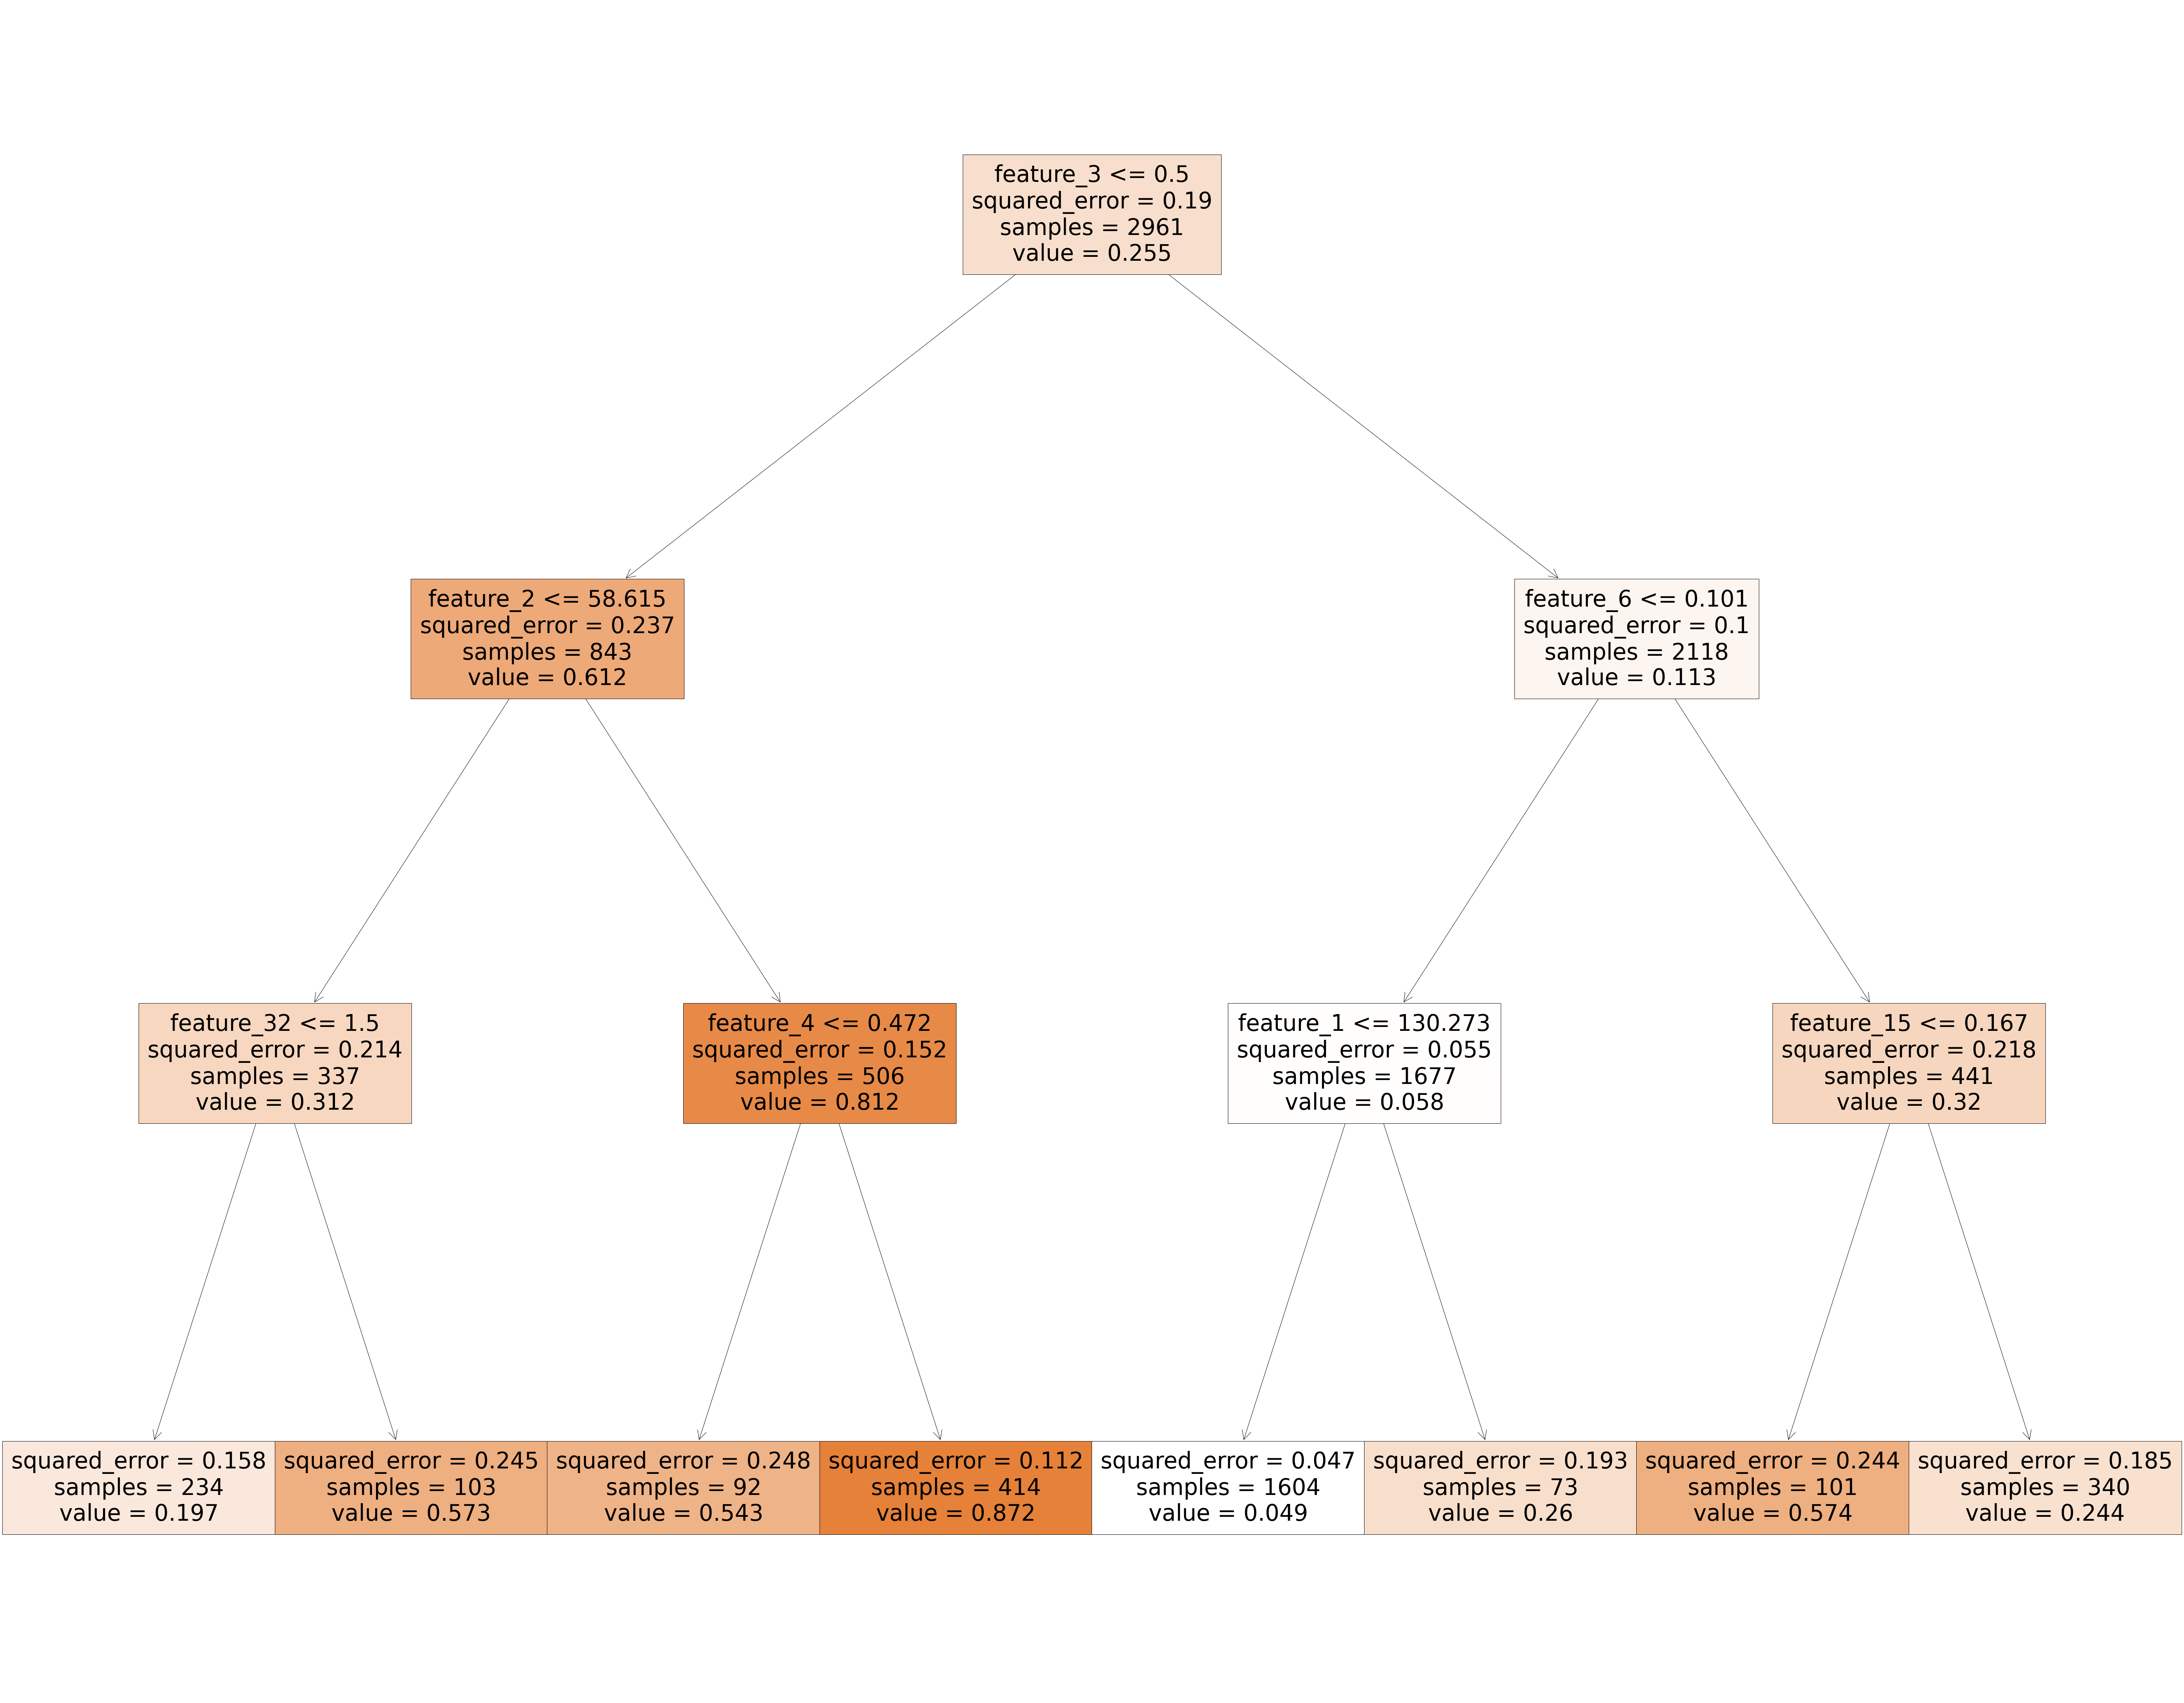

In [9]:
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(rgr, 
                   feature_names=features,  
                   filled=True)

<div class="alert alert-block alert-success">  
<b>Description:</b> General decision tree visualization, darker color of the node indicate higher predicted target values. Values are described in internal nodes as well.
</div>

In [10]:
fig.savefig("visualizations/rgr_sklearn_plot_tree.png");

<h4 align="center"> <font color='gray'>graphviz Plot</font></h4>

<div class="alert alert-block alert-success">  
<b>Description:</b> For a better readability we can also visualize the tree using graphviz library preserving the same inforamtion with a variety of aesthetic options, including coloring nodes by ther class and using explicit variable and class names if desired.
</div>

In [11]:
import graphviz

In [12]:
dot_data = tree.export_graphviz(rgr,
                                out_file=None,
                                feature_names=features,
                                class_names=['1', '0'],
                                filled=True)

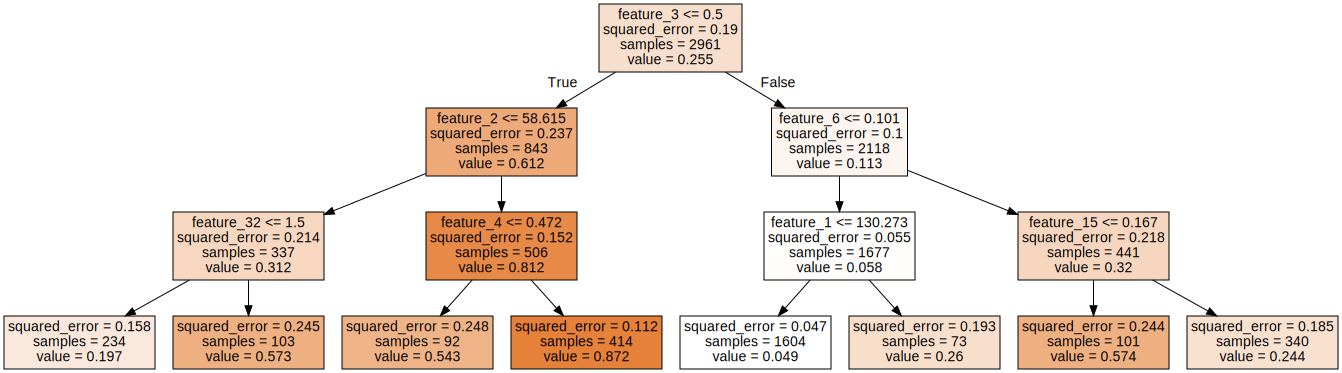

In [13]:
graph = graphviz.Source(dot_data, format="png")
graph

In [14]:
graph.render("visualizations/rgr_graphviz");